In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from qvalue import estimate
from glob import iglob

In [12]:
# Load the ClinVar-ExAC results
cv = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/clinvar-exac/clinvar-exac_KAD_summary.txt",delimiter='\t')
cv = cv.drop_duplicates(["sid","chain"])
cv.ix[~cv[ "p"].isnull(), "q"], K_lam, K_pi = estimate(cv.ix[~cv[ "p"].isnull(), "p"].values)

In [13]:
# Load the COSMIC-ExAC results
csm = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/cosmic-exac/cosmic-exac_KAD_summary.txt",delimiter='\t')
csm = csm.drop_duplicates(["sid","chain"])
csm.ix[~csm[ "p"].isnull(), "q"], K_lam, K_pi = estimate(csm.ix[~csm[ "p"].isnull(), "p"].values)

In [14]:
# Load the ClinVar COSMIC comparison results
cvc = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-09/clinvar-cosmic/clinvar-cosmic_KAD_summary.txt",delimiter='\t')
cvc = cvc.drop_duplicates(["sid","chain"])
cvc.ix[~cvc[ "p"].isnull(), "q"], K_lam, K_pi = estimate(cvc.ix[~cvc[ "p"].isnull(), "p"].values)

In [15]:
def prep_split(dfx):
    df  = dfx.copy()
    df['fdr']  = 'All (N=%4d)'%len(df)
    dft = dfx[dfx["q"]<0.1].copy()
    dft['fdr'] = 'FDR < 0.1'
    df = pd.concat((df,dft)).dropna(subset=["z"])
    df['dummy'] = ''
    return df

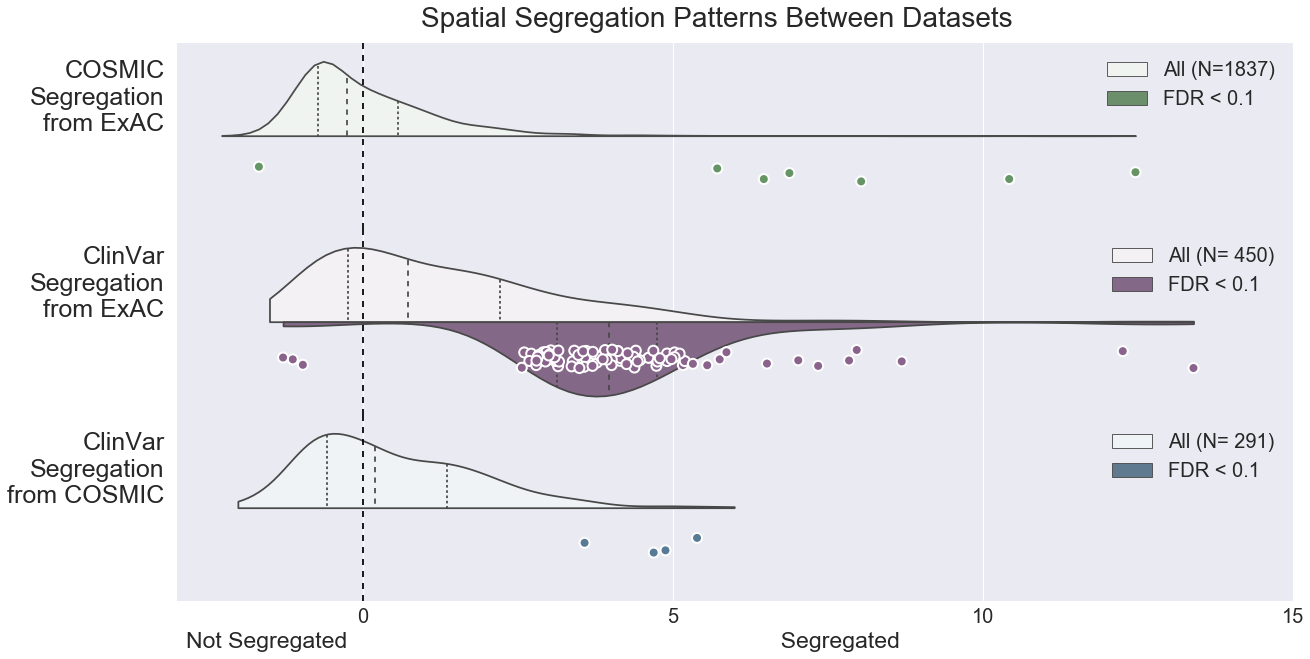

In [36]:
# Setup the plot
fig,ax = plt.subplots(3,1,figsize=(20,10),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for COSMIC somatic nsSNVs
df = prep_split(csm)
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','z'] = np.nan
sns.violinplot(x='z',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[2],split=True,scale='width',cut=0,ax=ax[0])
df.ix[df['fdr']!='FDR < 0.1','z'] = np.nan
sns.stripplot(x='z',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[2],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[0])
ax[0].set_ylabel("COSMIC\nSegregation\nfrom ExAC",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ClinVar pathogenic nsSNVs
df = prep_split(cv)
sns.violinplot(x='z',y='dummy',hue='fdr',data=df,inner='quart',color=pal[3],split=True,scale='width',cut=0,ax=ax[1])
df.ix[df['fdr']!='FDR < 0.1','z'] = np.nan
sns.stripplot(x='z',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[3],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[1])
ax[1].set_ylabel("ClinVar\nSegregation\nfrom ExAC",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ClinVar pathogenic nsSNVs
df = prep_split(cvc)
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','z'] = np.nan
sns.violinplot(x='z',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[1],split=True,scale='width',cut=0,ax=ax[2])
df.ix[df['fdr']!='FDR < 0.1','z'] = np.nan
sns.stripplot(x='z',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[1],split=True,orient='h',edgecolor='white',size=10,lw=2,ax=ax[2])
ax[2].set_ylabel("ClinVar\nSegregation\nfrom COSMIC",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Not Segregated%sSegregated%s"%(' '*68,' '*60),fontsize=23)
for x in ax:
    x.axvline(x=0,c='black',ls='dashed')
plt.xlim([-3,15])
plt.suptitle("Spatial Segregation Patterns Between Datasets",fontsize=28,y=0.95)
plt.show()